In [4]:
#ucitavanje paketa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
from nltk.corpus import words

In [5]:
#citanje
data1 = pd.read_csv("spam.csv",encoding='latin-1')


#spajanje zadnja cetri stupca kako bi ostavili poruke u potpunosti spojenima
data1 = data1.rename(columns={"Unnamed: 2":"two", "Unnamed: 3":"tri","Unnamed: 4":"cetr"})
a =  data1[data1["two"].notnull()]["v2"].map(str) + data1[data1["two"].notnull()]["two"].map(str)
data1.loc[data1["two"].notnull(),"v2"] = a
a =  data1[data1["tri"].notnull()]["v2"].map(str) + data1[data1["tri"].notnull()]["tri"].map(str)
data1.loc[data1["tri"].notnull(),"v2"] = a
a =  data1[data1["cetr"].notnull()]["v2"].map(str) + data1[data1["cetr"].notnull()]["cetr"].map(str)
data1.loc[data1["cetr"].notnull(),"v2"] = a
data1 = data1[["v1","v2"]]
#data1.to_csv("proba.csv")



data1 = data1.rename(columns={"v1":"category_class", "v2":"sms"})
codes = {'ham':0, 'spam':1}
data1["class"] = data1["category_class"].map(codes)
#data1.tail()

#a.to_csv("proba.csv")

In [30]:
# **NOVO - dodani featuri u dataframe i imas statistike prosjecne za svaki
from string import punctuation
spunctuation = set(punctuation)
swords = set(words.words())
def englishWordsPercentage(message):
    return sum(1 for c in message.split() if not c.isdigit() and c.lower() in swords)/len(message)
def countUpperLetters(message):
    return sum(1 for c in message if c.isupper())
def countDigits(message):
    return sum(c.isdigit() for c in message)
def countNonAlphaNumerical(message):
    return sum(not c.isalnum() for c in message)
def smallWordsRatio(message):
    return sum(1 for c in message.split() if len(c) <= 3)/len(message)
def capitalWordsRatio(message):
    return sum(1 for c in message.split() if c[0].isupper())/len(message)
def punctuationRatio(message):
    return sum(c in spunctuation for c in message)/len(message)
def urls(message):
    return sum('www' in c or '.net' in c or 'http' in c or '.com' in c for c in message.split())

data1["upper_letters"] = data1["sms"].apply(countUpperLetters)
data1["small_words"] = data1["sms"].apply(smallWordsRatio)
data1["capital_words"] = data1["sms"].apply(capitalWordsRatio)
data1["punctuation"] = data1["sms"].apply(punctuationRatio)
data1["urls"] = data1["sms"].apply(urls)

data1['length'] = data1['sms'].apply(len)
data1["numeric_chars"] = data1["sms"].apply(countDigits)
data1["non_alpha_num"] = data1["sms"].apply(countNonAlphaNumerical)
data1["englishPercentage"] = data1["sms"].apply(englishWordsPercentage)
print(data1.groupby("class").mean())

       upper_letters  small_words  capital_words  punctuation      urls  \
class                                                                     
0           4.173472     0.094153       0.042398     0.062885  0.003731   
1          15.483266     0.061207       0.049184     0.041112  0.170013   

           length  numeric_chars  non_alpha_num  englishPercentage  
class                                                               
0       71.627979       0.305285      17.500518           0.138482  
1      139.148594      15.812584      29.132530           0.100496  


In [21]:
def twoColloredPlot(data_ham, data_spam, title, mbins = 100, mrange = [0,250], mnormed= True):
    plt.figure(figsize=(12,8))
    plt.hist(data_ham, bins=mbins, range=mrange, normed=mnormed, label='ham')
    plt.hist(data_spam, bins=mbins, range=mrange,normed=mnormed, alpha=0.5, label='spam')
    plt.title(title, fontsize=15)
    plt.legend()

    plt.axvline(data_spam.mean(), color='k', linestyle='dashed', linewidth=1) 
    plt.axvline(data_ham.mean(), color='b', linestyle='dashed', linewidth=1) 
    
    print('# Summary statistics')
    print('mean-ham  {:.2f}   mean-spam {:.2f} \nstd-ham   {:.2f}   std-spam   {:.2f} \nmin-ham    {:.2f}   min-ham    {:.2f} \nmax-ham  {:.2f}   max-spam  {:.2f}'.format(data_ham.mean(), 
                         data_spam.mean(), data_ham.std(), data_spam.std(), data_ham.min(), data_spam.min(), data_ham.max(), data_spam.max()))


# Summary statistics
mean-ham  0.00   mean-spam 0.17 
std-ham   0.07   std-spam   0.39 
min-ham    0.00   min-ham    0.00 
max-ham  2.00   max-spam  2.00


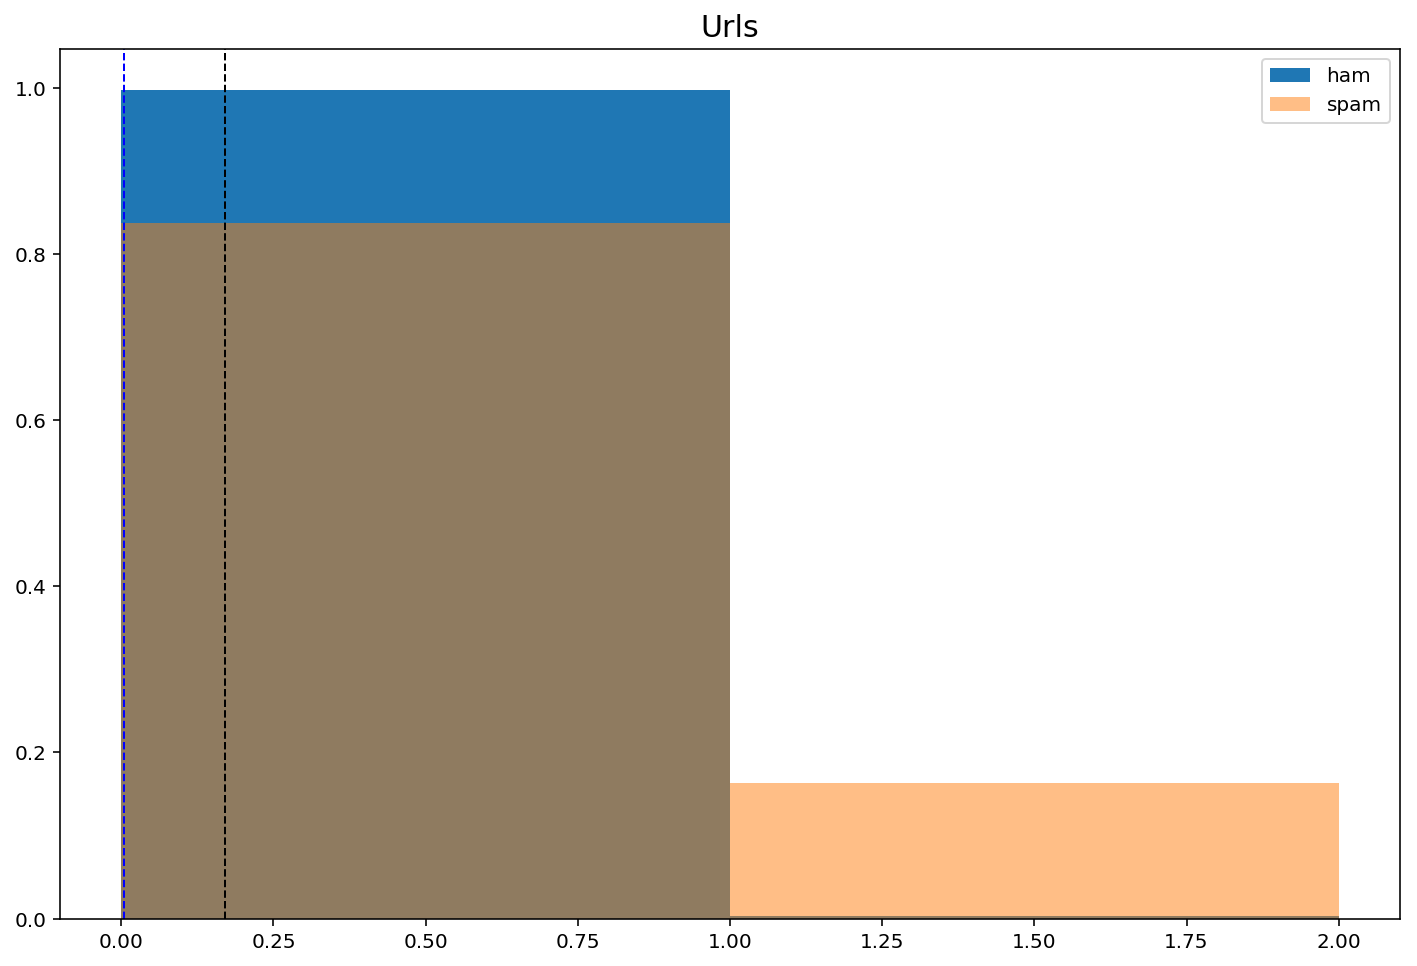

In [22]:
twoColloredPlot(data1[data1['class'] == 0]["urls"],
                data1[data1['class'] == 1]["urls"],
                'Urls', 2, [0,2])

# Summary statistics
mean-ham  0.06   mean-spam 0.04 
std-ham   0.06   std-spam   0.02 
min-ham    0.00   min-ham    0.00 
max-ham  0.86   max-spam  0.18


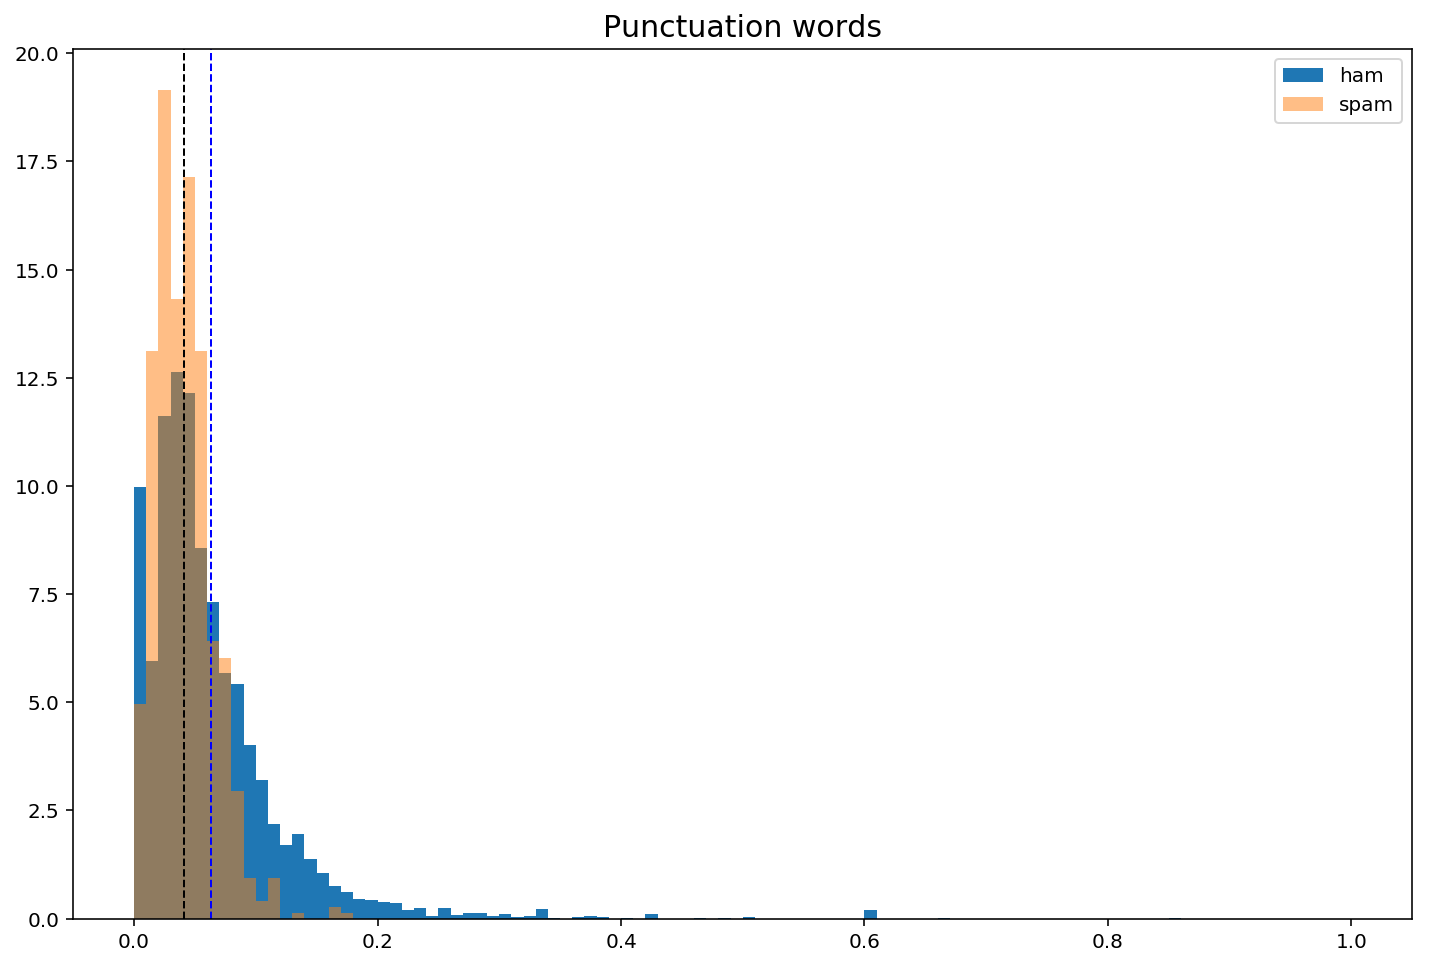

In [23]:
twoColloredPlot(data1[data1['class'] == 0]["punctuation"],
                data1[data1['class'] == 1]["punctuation"],
                'Punctuation words', 100, [0,1])

# Summary statistics
mean-ham  0.04   mean-spam 0.05 
std-ham   0.04   std-spam   0.02 
min-ham    0.00   min-ham    0.00 
max-ham  0.50   max-spam  0.17


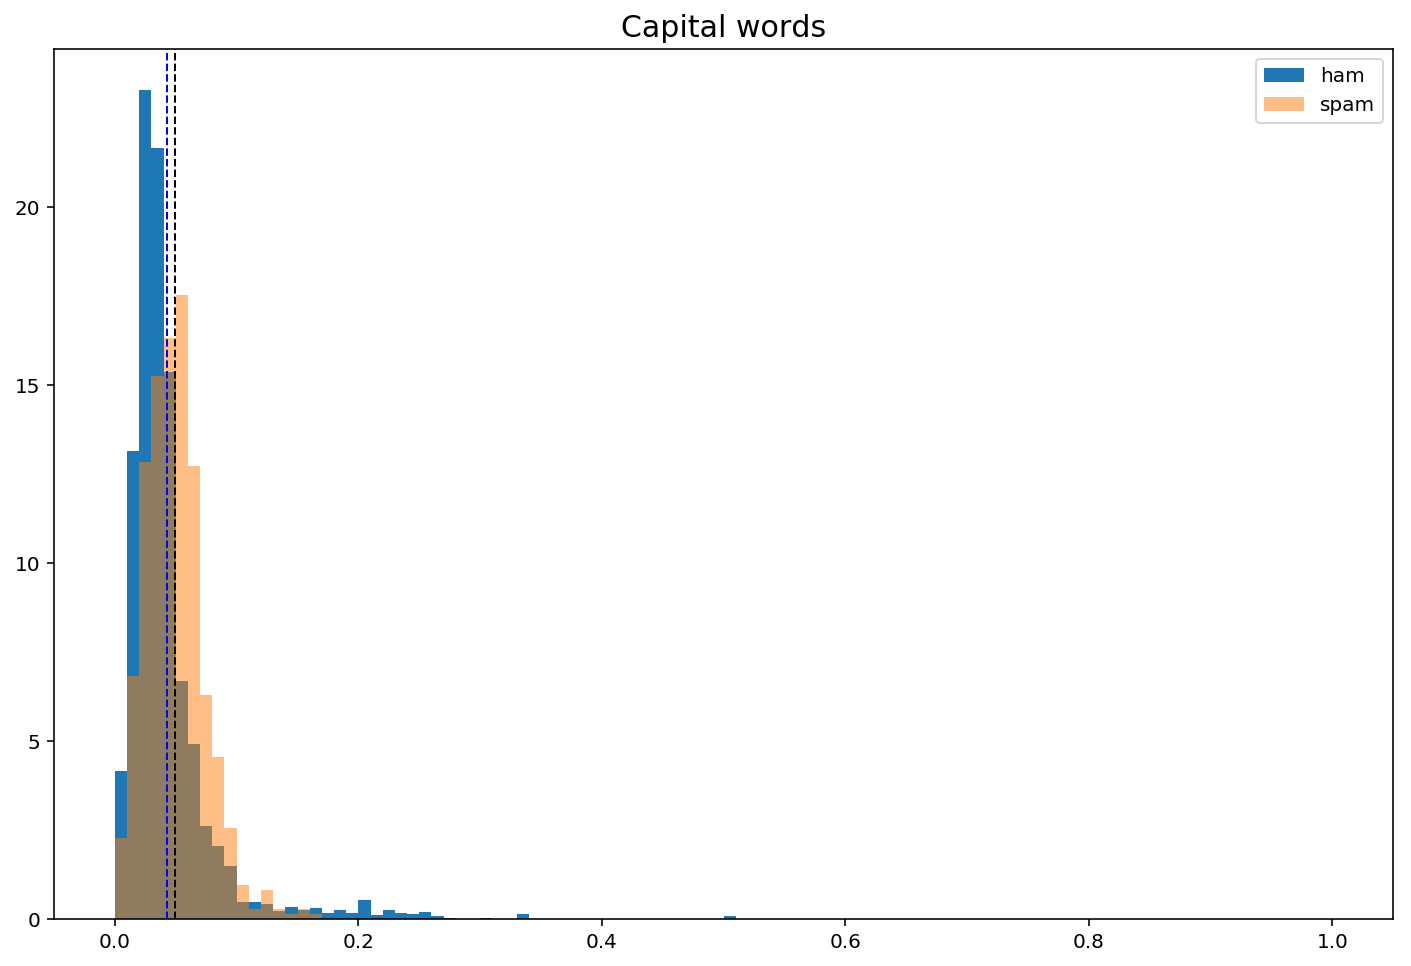

In [24]:
twoColloredPlot(data1[data1['class'] == 0]["capital_words"],
                data1[data1['class'] == 1]["capital_words"],
                'Capital words', 100, [0,1])

# Summary statistics
mean-ham  0.09   mean-spam 0.06 
std-ham   0.05   std-spam   0.02 
min-ham    0.00   min-ham    0.00 
max-ham  0.50   max-spam  0.14


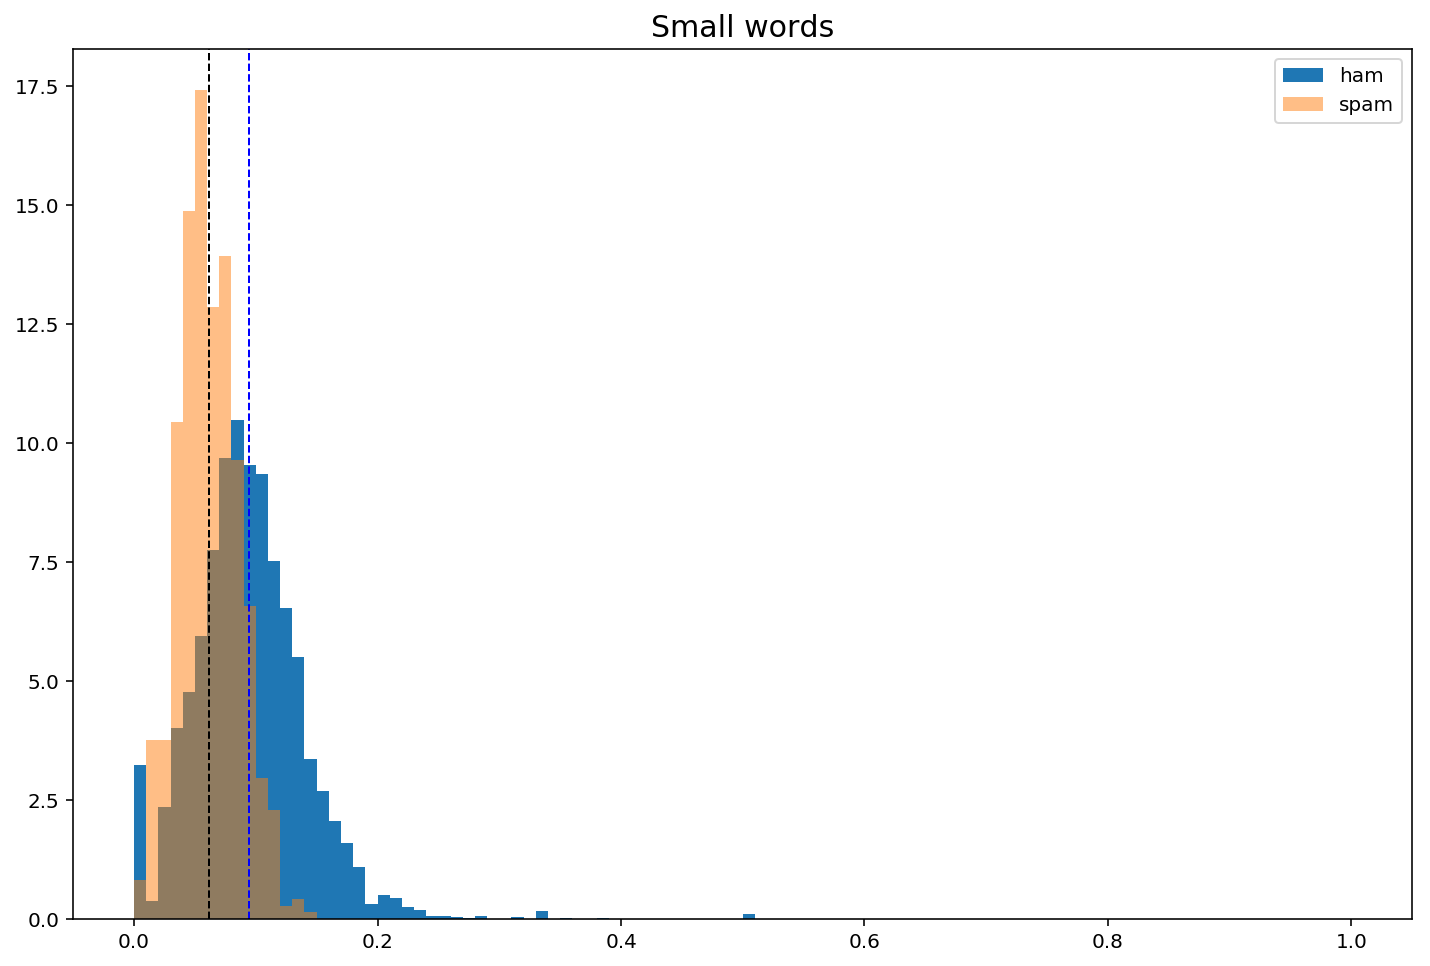

In [25]:
twoColloredPlot(data1[data1['class'] == 0]["small_words"],
                data1[data1['class'] == 1]["small_words"],
                'Small words', 100, [0,1])

# Summary statistics
mean-ham  71.63   mean-spam 139.15 
std-ham   58.44   std-spam   28.98 
min-ham    2.00   min-ham    13.00 
max-ham  910.00   max-spam  224.00


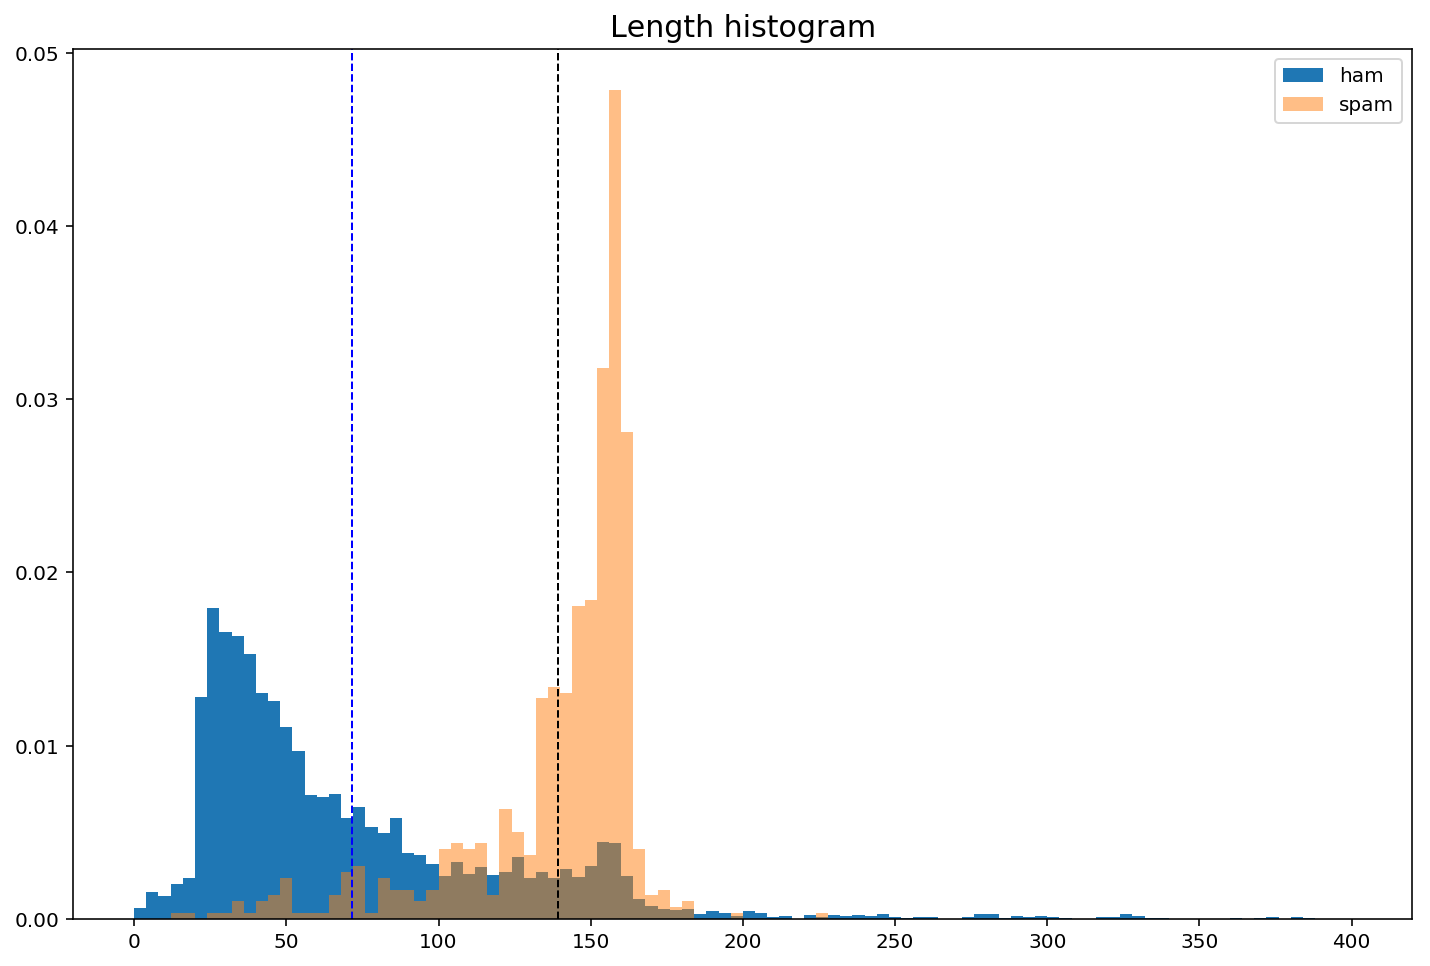

In [26]:
twoColloredPlot(data1[data1['class'] == 0]["length"],
                data1[data1['class'] == 1]["length"],
                'Length histogram', 100, [0,400])

# Summary statistics
mean-ham  0.14   mean-spam 0.10 
std-ham   0.05   std-spam   0.03 
min-ham    0.00   min-ham    0.00 
max-ham  0.31   max-spam  0.20


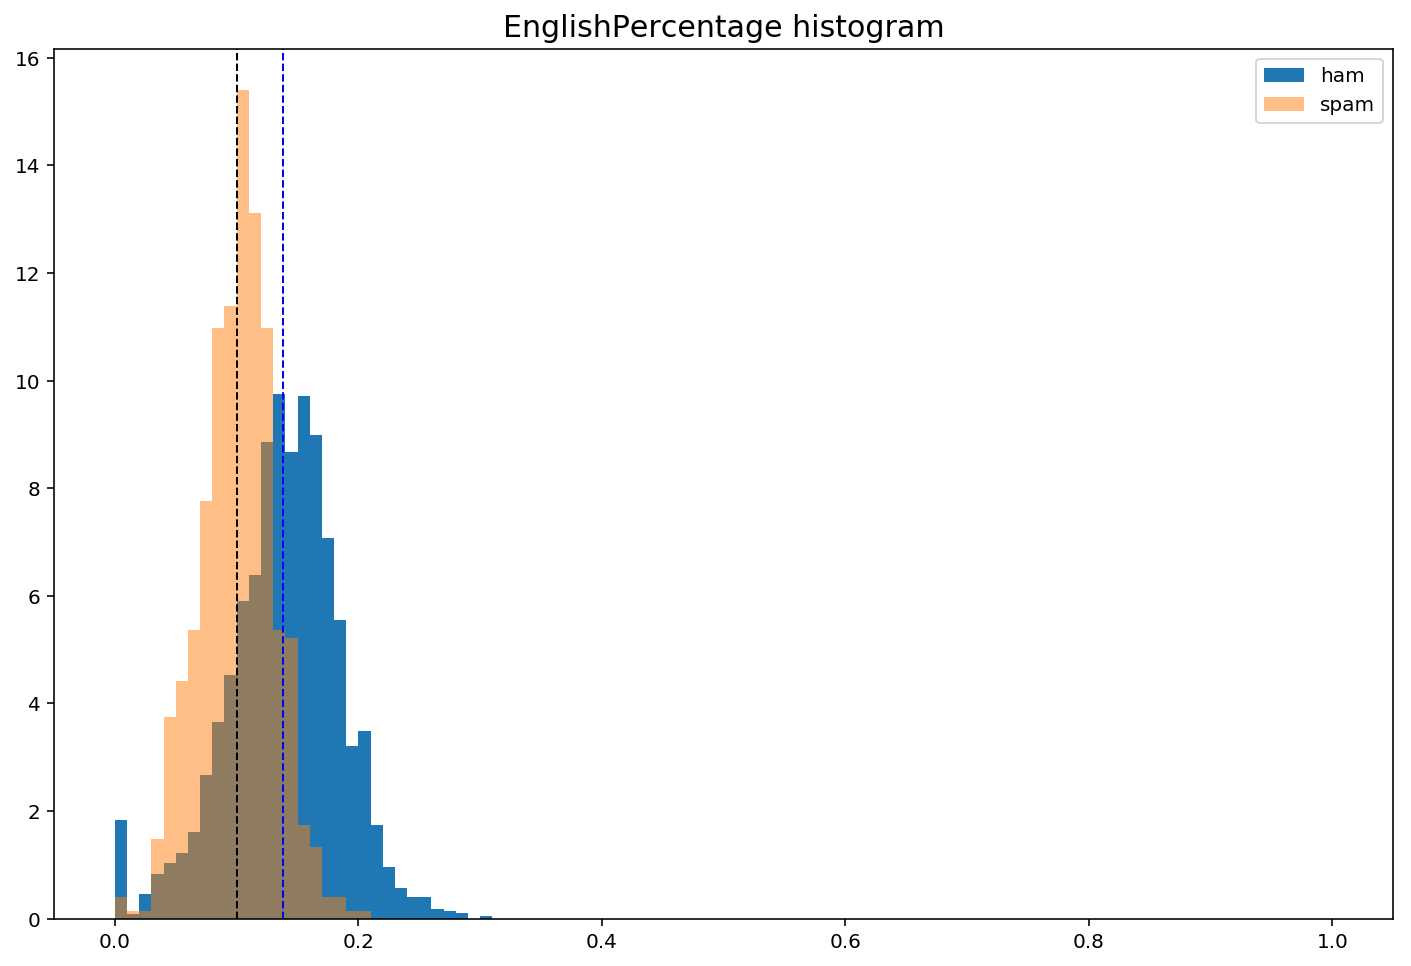

In [27]:
twoColloredPlot(data1[data1['class'] == 0]["englishPercentage"],
                data1[data1['class'] == 1]["englishPercentage"],
                'EnglishPercentage histogram', 100, [0,1])

# Summary statistics
mean-ham  4.17   mean-spam 15.48 
std-ham   10.83   std-spam   12.30 
min-ham    0.00   min-ham    0.00 
max-ham  129.00   max-spam  128.00


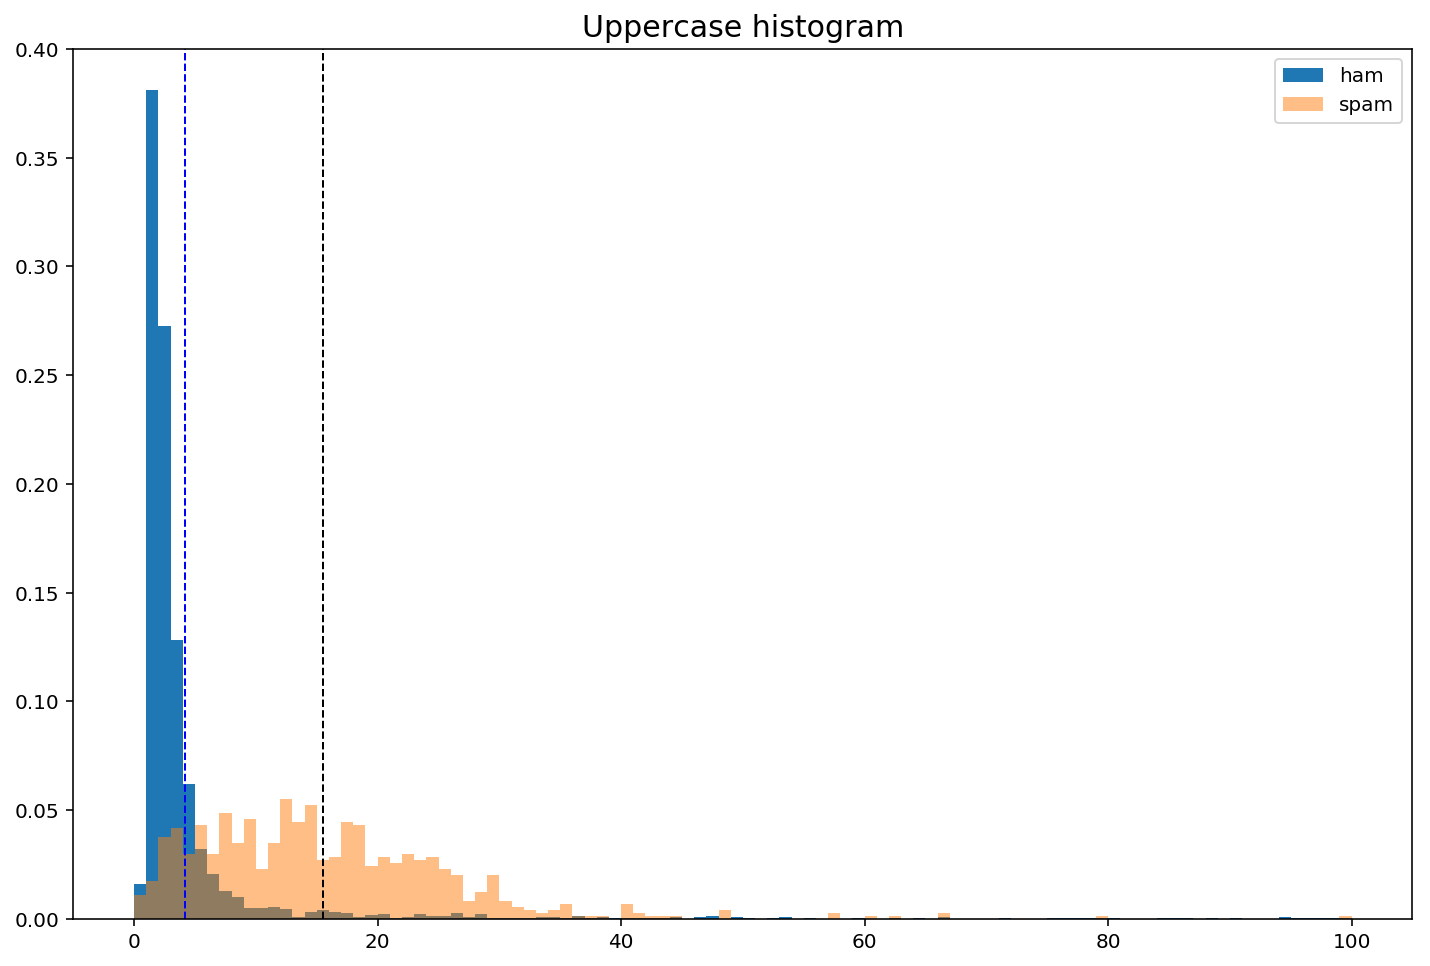

In [28]:
twoColloredPlot(data1[data1['class'] == 0]["upper_letters"],
                data1[data1['class'] == 1]["upper_letters"],
                'Uppercase histogram', 100, [0,100])

# Summary statistics
mean-ham  0.31   mean-spam 15.81 
std-ham   1.07   std-spam   8.72 
min-ham    0.00   min-ham    0.00 
max-ham  23.00   max-spam  47.00


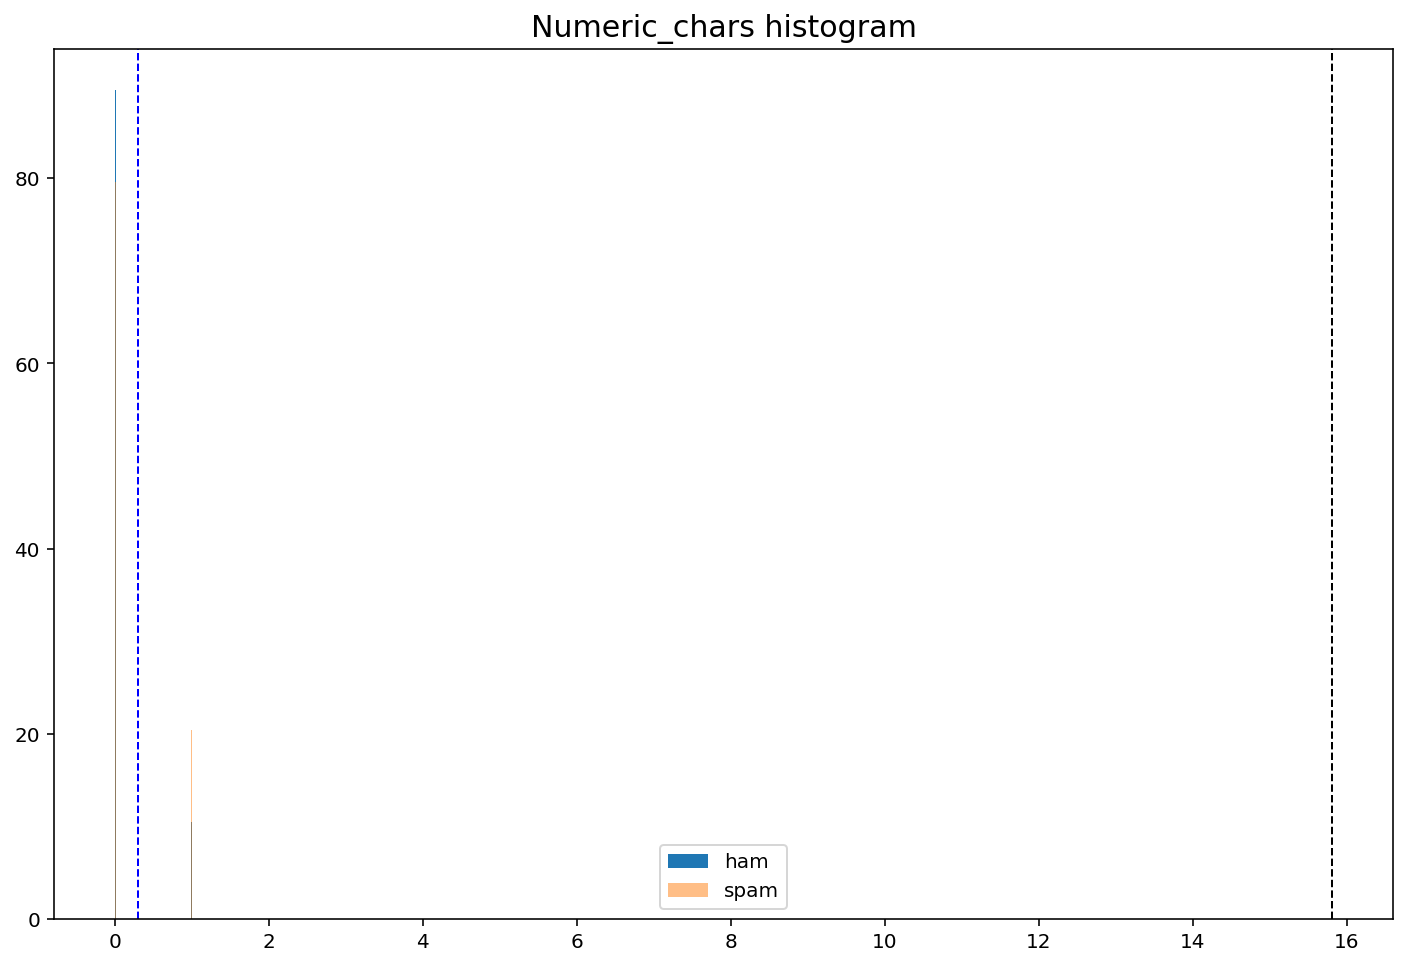

In [29]:
twoColloredPlot(data1[data1['class'] == 0]["numeric_chars"],
                data1[data1['class'] == 1]["numeric_chars"],
                'Numeric_chars histogram', 100, [0,1])

# Summary statistics
mean-ham  17.50   mean-spam 29.13 
std-ham   15.18   std-spam   7.30 
min-ham    0.00   min-ham    1.00 
max-ham  253.00   max-spam  50.00


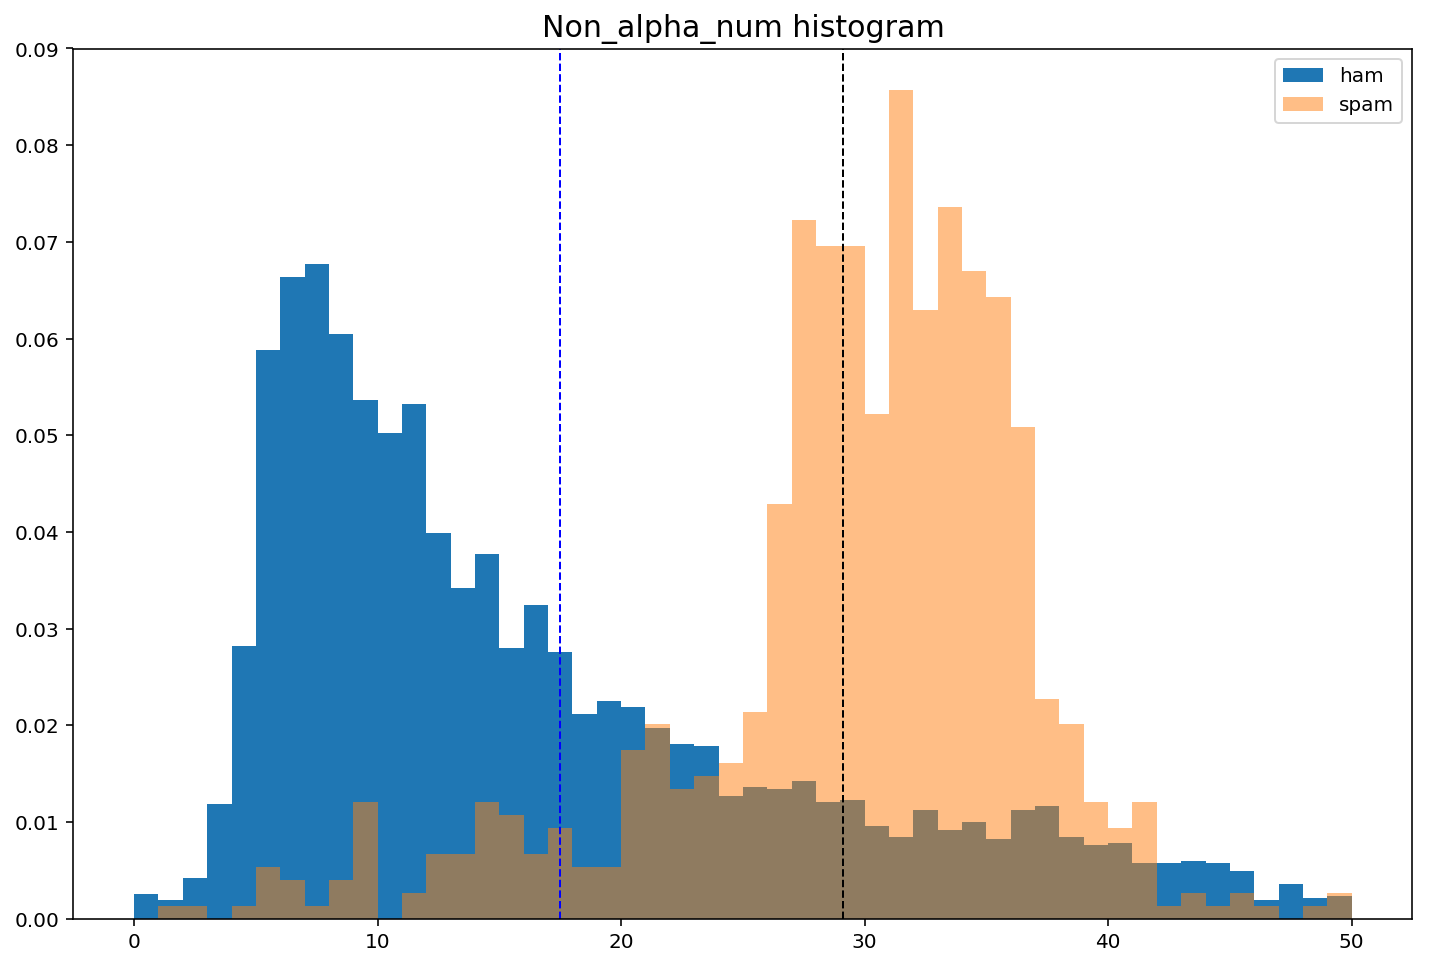

In [15]:
twoColloredPlot(data1[data1['class'] == 0]["non_alpha_num"],
                data1[data1['class'] == 1]["non_alpha_num"],
                'Non_alpha_num histogram', 50, [0,50])